In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
from sklearn.neighbors import KDTree
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import minmax_scale
from project_helpers import shuffle_neighbors, plot_roc_curve
%matplotlib inline

In [2]:
# data = np.random.laplace(size=(200, 2))
# data, color = make_blobs(n_samples=1000, centers=2, random_state=12, cluster_std=2.0)
data, color = make_moons(n_samples=1000, noise=0.5, random_state=12)
data = minmax_scale(data)
data = np.array([data[:,0], data[:,1], color]).T


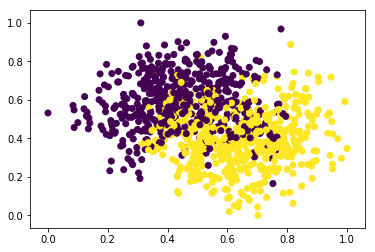

In [3]:
fig = plt.figure()
scatter = plt.scatter(data[:, 0], data[:, 1], c=data[:,2])

In [4]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [5]:
clf = LogisticRegressionCV()
clf_sh = LogisticRegressionCV()
X_train, X_test, y_train, y_test = train_test_split(data[:,0:2], data[:,2], test_size=0.2, random_state=9)

In [6]:
Xy_train_sh = np.array([X_train[:,0],X_train[:,1],y_train]).T
for i in range(0, 101):
    Xy_train_sh = shuffle_neighbors(Xy_train_sh)
X_train_sh, y_train_sh = (Xy_train_sh[:,0:2], Xy_train_sh[:,2])

In [7]:
clf.fit(X_train, y_train)
clf_sh.fit(X_train_sh, y_train_sh)
(clf.score(X_test, y_test), clf_sh.score(X_test, y_test))

(0.855, 0.855)

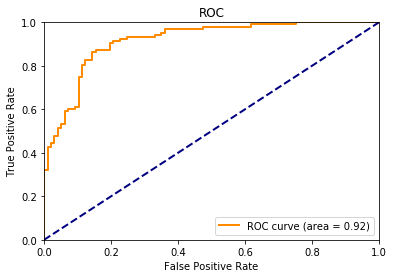

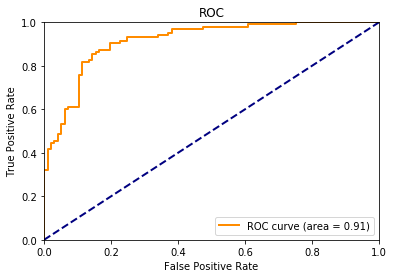

In [8]:
plot_roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plot_roc_curve(y_test, clf_sh.predict_proba(X_test)[:,1])

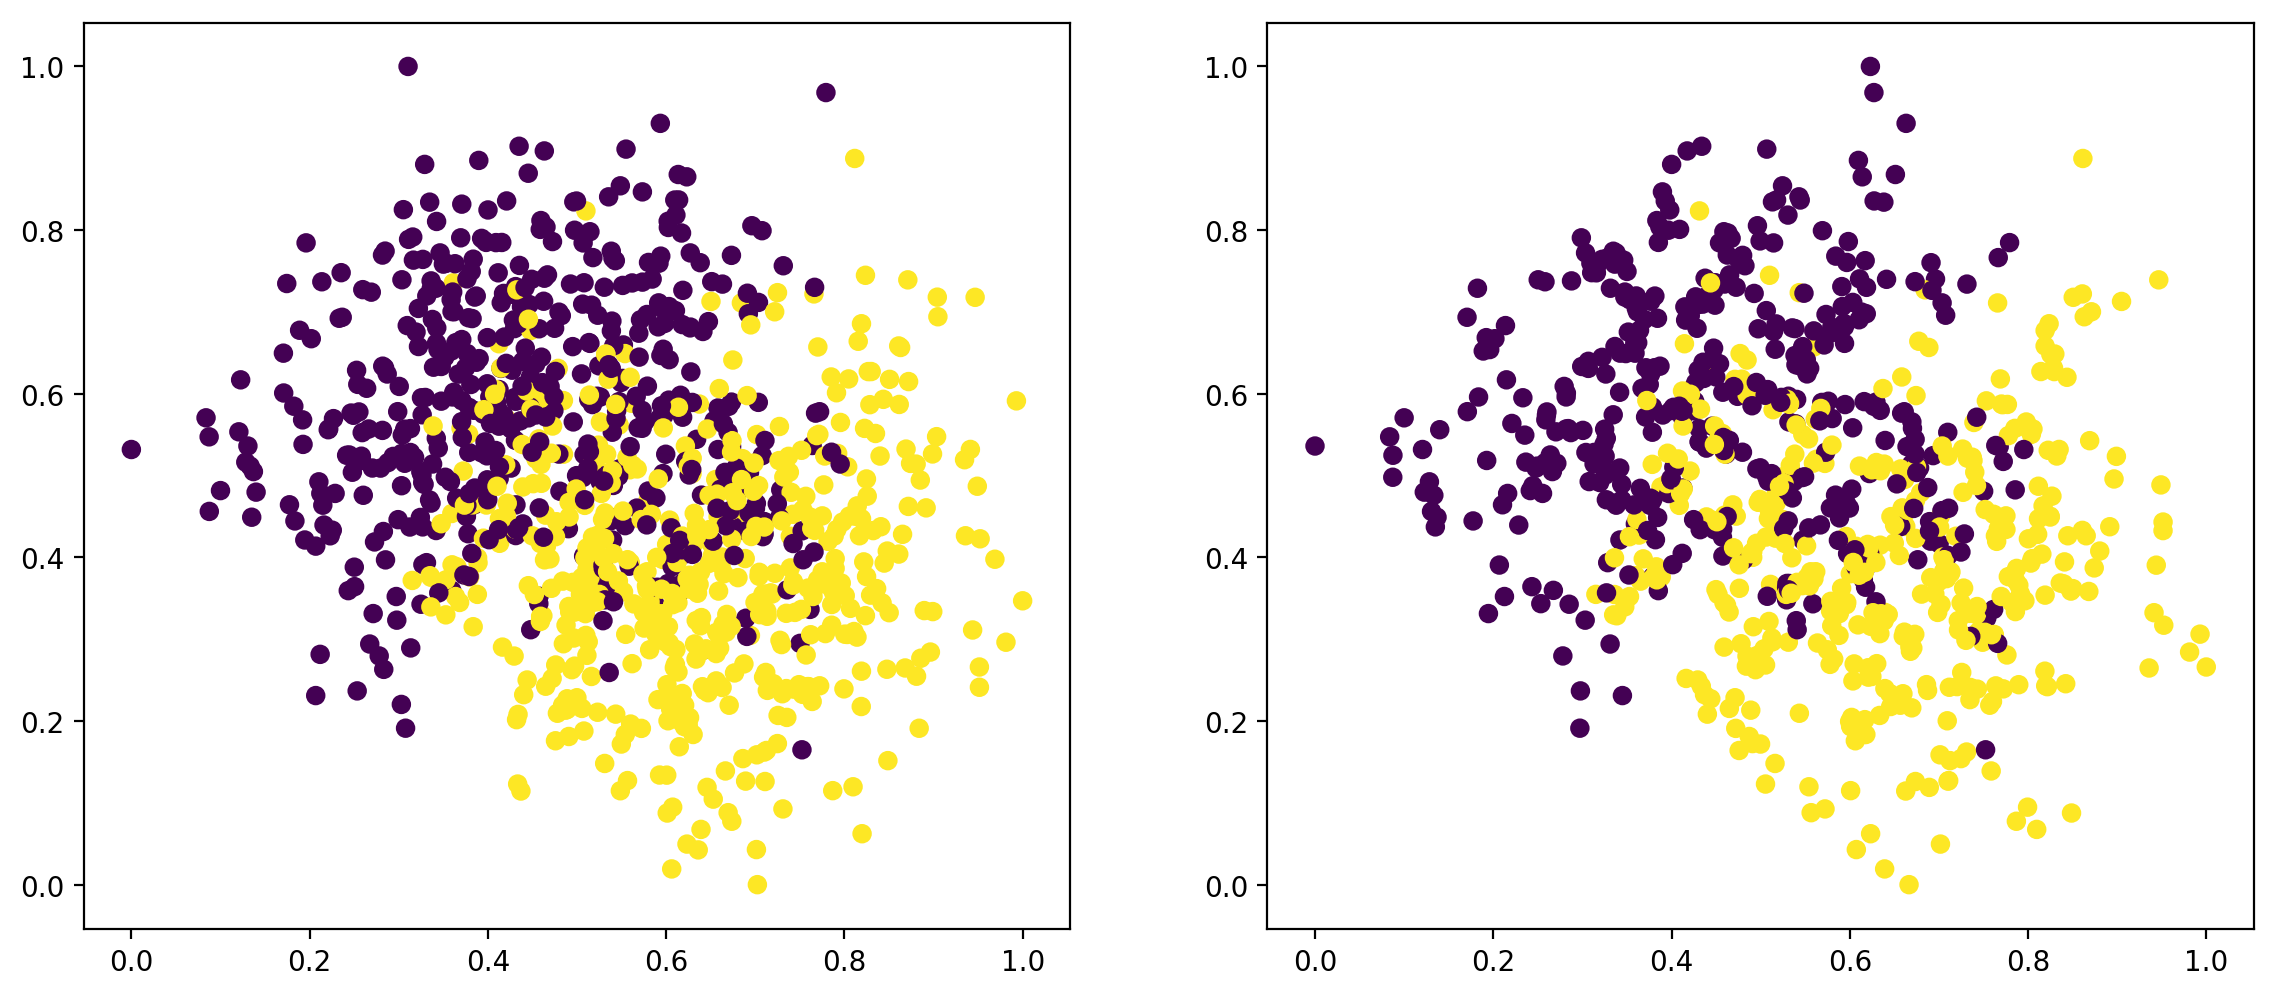

In [9]:
fig, ax = plt.subplots(ncols=2,nrows=1,figsize=(14,6), dpi=200)
ax[0].scatter(data[:, 0], data[:, 1], c=data[:,2])
ax[1].scatter(X_train_sh[:, 0], X_train_sh[:, 1], c=y_train);